In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [104]:
# Load the dataset into dataframe
df = pd.read_csv('data/dataset.csv')

# Display the first few row of the dataframe
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


Data Preparation and Cleaning

In [105]:
# Get the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [106]:
# Check the missing and null values
df.isna().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [107]:
# Cleaning the null values
df.dropna(inplace=True)
df.isna().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [108]:
# Summary statistic for the dataframe

df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112152.000000,112152.000000,112152.000000,112152.000000,112152.000000,1.121520e+05,1.121520e+05
mean,98258.856659,2019.004494,87.829651,1793.882320,29.817703,1.994712e+08,5.303958e+10
std,302.889935,2.891859,102.336645,10785.259118,14.698726,9.401842e+07,1.617788e+07
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,5.300195e+10
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484164e+08,5.303301e+10
50%,98121.000000,2020.000000,32.000000,0.000000,34.000000,1.923916e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191885e+08,5.305307e+10
max,99403.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10


In [109]:
# Explore the number of rows and columns and print the columns.

print(df.shape)
print(df.columns)
df.rename(columns={'VIN (1-10)':'VIN', 'Postal Code':'Zip_Code','Model Year':'Model_Year','Electric Vehicle Type':'EV_Type',
                   'Clean Alternative Fuel Vehicle (CAFV) Eligibility':'CAFV','Electric Range':'Elecric_Range',
                   'Base MSRP':'MSRP','Legislative District':'District','DOL Vehicle ID':'Vehicle_ID','Vehicle Location':'Vehicle_Location',
                   'Electric Utility':'Utility','2020 Census Tract':'Census_Tract_2020'}, inplace=True)

(112152, 17)
Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [110]:
# Printing the numerical and discreet feature saparately.
num_cols = df.select_dtypes(include=['number']).columns
print(num_cols)

cat_cols = df.select_dtypes(exclude=['number']).columns
print(cat_cols)

Index(['Zip_Code', 'Model_Year', 'Elecric_Range', 'MSRP', 'District',
       'Vehicle_ID', 'Census_Tract_2020'],
      dtype='object')
Index(['VIN', 'County', 'City', 'State', 'Make', 'Model', 'EV_Type', 'CAFV',
       'Vehicle_Location', 'Utility'],
      dtype='object')


In [111]:
# Defining a formula to find the various measures
def univariate_anslysis_num_cols(num_data):
    for col_name in num_data:
        print('*'*10,col_name,'*'*10)
        print(num_data[col_name].agg(['min','max','mean','median','std','skew','kurt']))
        print()

In [112]:
univariate_anslysis_num_cols(df[num_cols])

********** Zip_Code **********
min       98001.000000
max       99403.000000
mean      98258.856659
median    98121.000000
std         302.889935
skew          1.827482
kurt          3.126512
Name: Zip_Code, dtype: float64

********** Model_Year **********
min       1997.000000
max       2023.000000
mean      2019.004494
median    2020.000000
std          2.891859
skew        -0.818422
kurt         0.001394
Name: Model_Year, dtype: float64

********** Elecric_Range **********
min         0.000000
max       337.000000
mean       87.829651
median     32.000000
std       102.336645
skew        0.816322
kurt       -0.877834
Name: Elecric_Range, dtype: float64

********** MSRP **********
min            0.000000
max       845000.000000
mean        1793.882320
median         0.000000
std        10785.259118
skew          10.113620
kurt         372.907751
Name: MSRP, dtype: float64

********** District **********
min        1.000000
max       49.000000
mean      29.817703
median    34.000000
s

In [113]:
def univariate_anslysis_cat_cols(cat_data):
    for i in cat_data:
        print('*'*10,i,'*'*10)
        print(cat_data[i].agg(['count','nunique']))
        print()

In [114]:
univariate_anslysis_cat_cols(df[['County', 'City', 'State', 'Make', 'Model', 'EV_Type', 'CAFV',
       'Vehicle_Location', 'Utility']])

********** County **********
count      112152
nunique        39
Name: County, dtype: int64

********** City **********
count      112152
nunique       435
Name: City, dtype: int64

********** State **********
count      112152
nunique         1
Name: State, dtype: int64

********** Make **********
count      112152
nunique        34
Name: Make, dtype: int64

********** Model **********
count      112152
nunique       114
Name: Model, dtype: int64

********** EV_Type **********
count      112152
nunique         2
Name: EV_Type, dtype: int64

********** CAFV **********
count      112152
nunique         3
Name: CAFV, dtype: int64

********** Vehicle_Location **********
count      112152
nunique       516
Name: Vehicle_Location, dtype: int64

********** Utility **********
count      112152
nunique        73
Name: Utility, dtype: int64



In [115]:
# Count the total number of cars by car name
df['Make'].value_counts()

Make
TESLA             51883
NISSAN            12846
CHEVROLET         10140
FORD               5780
BMW                4660
KIA                4469
TOYOTA             4368
VOLKSWAGEN         2507
AUDI               2320
VOLVO              2256
CHRYSLER           1780
HYUNDAI            1407
JEEP               1143
RIVIAN              883
FIAT                820
PORSCHE             817
HONDA               788
MINI                631
MITSUBISHI          585
POLESTAR            557
MERCEDES-BENZ       503
SMART               271
JAGUAR              218
LINCOLN             167
CADILLAC            108
LUCID MOTORS         65
SUBARU               59
LAND ROVER           38
LEXUS                33
FISKER               19
GENESIS              18
AZURE DYNAMICS        7
TH!NK                 3
BENTLEY               3
Name: count, dtype: int64

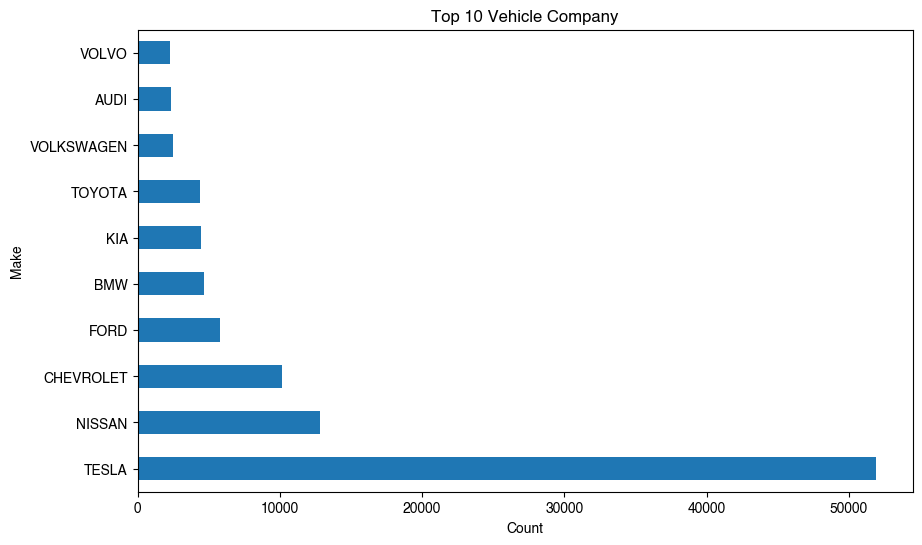

In [116]:
# Top 10 vehicle company name in horizontal graph.

plt.figure(figsize=(10,6))
df['Make'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Vehicle Company')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()

Tesla is the company who has sold the maximum number of cars which is 51883. It is followed by Nissan which has sold 12846 cars.

P1. Finding the variation of base MSRP accross Makes

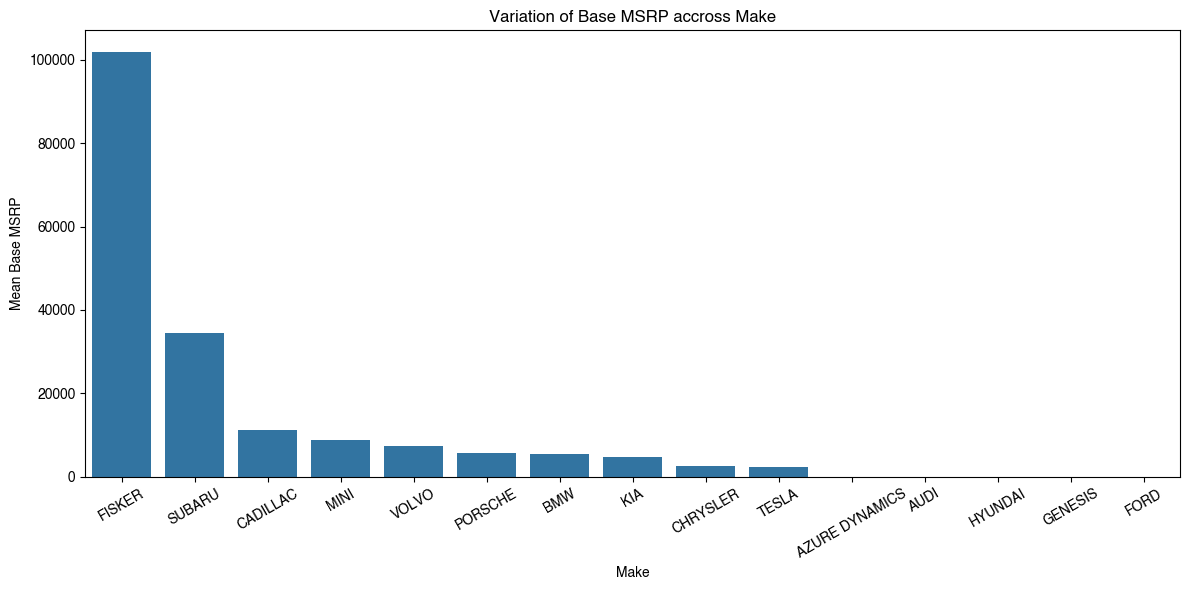

In [117]:
# Groupby 'Make' and calculate the mean on Base MSRP
base_msrp_by_make = df.groupby('Make')['MSRP'].mean().sort_values(ascending=False).head(15)

# Plotting the Bar Plot
plt.figure(figsize=(12,6))
sns.barplot(x=base_msrp_by_make.index,y=base_msrp_by_make.values)
plt.xticks(rotation=30)
plt.xlabel('Make')
plt.ylabel('Mean Base MSRP')
plt.title('Variation of Base MSRP accross Make')
plt.tight_layout()
plt.show()

The Mean MSRP of make 'FISKER' is highest among all the make.

In [118]:
# Count the common electic vehicle types

df['EV_Type'].value_counts()

EV_Type
Battery Electric Vehicle (BEV)            85732
Plug-in Hybrid Electric Vehicle (PHEV)    26420
Name: count, dtype: int64

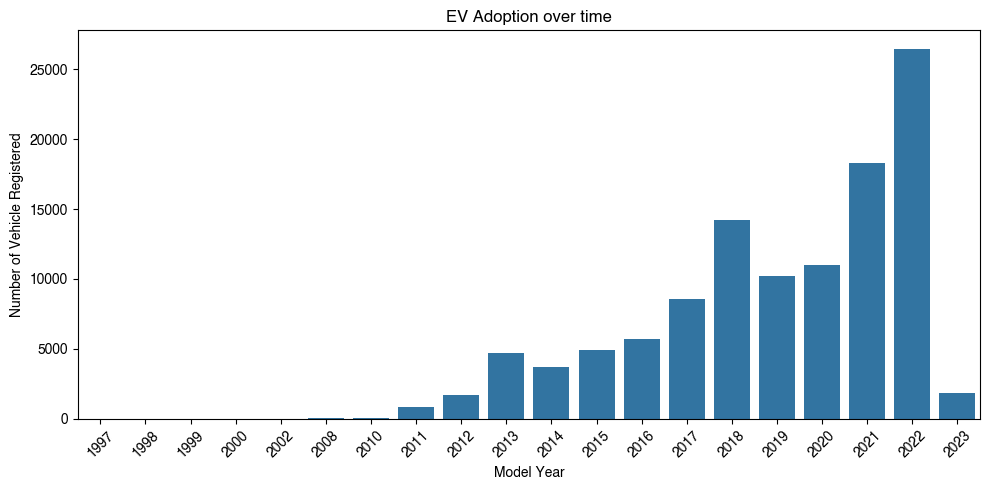

In [119]:
# Visualizing Electice Vehicle adoption over time

EV_by_years = df['Model_Year'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.barplot(x=EV_by_years.index, y=EV_by_years.values)
plt.title('EV Adoption over time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicle Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [120]:
df.head()

,VIN,County,City,State,Zip_Code,Model_Year,Make,Model,EV_Type,CAFV,Elecric_Range,MSRP,District,Vehicle_ID,Vehicle_Location,Utility,Census_Tract_2020
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500
5,5YJ3E1EB5J,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,475635324,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,53061051916
6,1N4AZ0CP4D,Snohomish,Everett,WA,98203,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,38.0,253546023,POINT (-122.23019 47.94949),PUGET SOUND ENERGY INC,53061040900


In [121]:
# Creating a Choropleth using plotly.express to display the number of EV vehicles based on location

# creating a dataframe grouped by the Zip Code
df_grouped = df.groupby('Zip_Code').size().reset_index(name='EV_Count')

fig = px.choropleth(
    df_grouped,
    geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
    locations='Zip_Code',
    featureidkey='properties.ZCTA5CE10',
    color='EV_Count',
    scope='usa',
    title='Electric Vehicles by Zip Code in Washington State'
)

fig.update_geos(fitbounds='locations')

fig.show()

In [122]:
fig.write_html('choropleth_map.html')

In [123]:
# Creating a Racing Bar Plot to display the animation of EV Make and its count each year
import bar_chart_race as bcr

In [124]:
df1 = df[df['Model_Year'] >= 2013]

In [125]:
df1 = df1.groupby(['Model_Year', 'Make']).size().reset_index(name='EV_Count')

In [126]:
df1.head()

,Model_Year,Make,EV_Count
0,2013,CHEVROLET,814
1,2013,FIAT,106
2,2013,FORD,656
3,2013,NISSAN,1959
4,2013,SMART,29


In [127]:
df_pivot = df1.pivot(index='Model_Year', columns='Make', values='EV_Count')
df_pivot = df_pivot.ffill()
df_pivot

Make,AUDI,BENTLEY,BMW,CADILLAC,CHEVROLET,CHRYSLER,FIAT,FORD,GENESIS,HONDA,...,NISSAN,POLESTAR,PORSCHE,RIVIAN,SMART,SUBARU,TESLA,TOYOTA,VOLKSWAGEN,VOLVO
Model_Year,,,,,,,,,,,,,,,,,,,,,
2013,NaN,NaN,NaN,NaN,814.0,NaN,106.0,656.0,NaN,NaN,...,1959.0,NaN,NaN,NaN,29.0,NaN,812.0,293.0,NaN,NaN
2014,NaN,NaN,457.0,58.0,718.0,NaN,97.0,619.0,NaN,9.0,...,692.0,NaN,8.0,NaN,71.0,NaN,681.0,214.0,NaN,NaN
2015,NaN,NaN,401.0,58.0,465.0,NaN,242.0,550.0,NaN,9.0,...,1836.0,NaN,33.0,NaN,52.0,NaN,1083.0,87.0,123.0,NaN
2016,214.0,NaN,379.0,18.0,308.0,NaN,147.0,772.0,NaN,9.0,...,1205.0,NaN,78.0,NaN,30.0,NaN,1630.0,87.0,319.0,112.0
2017,185.0,NaN,684.0,15.0,2734.0,94.0,166.0,655.0,NaN,9.0,...,933.0,NaN,71.0,NaN,33.0,NaN,1671.0,890.0,52.0,115.0
2018,173.0,NaN,709.0,17.0,1119.0,548.0,53.0,170.0,NaN,610.0,...,1229.0,NaN,77.0,NaN,47.0,NaN,7892.0,658.0,39.0,224.0
2019,387.0,NaN,279.0,17.0,963.0,118.0,9.0,135.0,NaN,73.0,...,1404.0,NaN,62.0,NaN,9.0,58.0,4558.0,188.0,494.0,190.0
2020,224.0,1.0,143.0,17.0,1013.0,283.0,9.0,65.0,NaN,79.0,...,580.0,NaN,143.0,NaN,9.0,58.0,6988.0,309.0,494.0,162.0
2021,542.0,1.0,634.0,17.0,375.0,500.0,9.0,877.0,NaN,17.0,...,532.0,97.0,145.0,NaN,9.0,58.0,10981.0,928.0,983.0,576.0


In [128]:
from IPython.display import Image

/Users/rajumeher/Desktop/Projects/eda_ev/.venv/lib/python3.12/site-packages/bar_chart_race/_make_chart.py:889: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/Users/rajumeher/Desktop/Projects/eda_ev/.venv/lib/python3.12/site-packages/bar_chart_race/_make_chart.py:286: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/Users/rajumeher/Desktop/Projects/eda_ev/.venv/lib/python3.12/site-packages/bar_chart_race/_make_chart.py:287: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



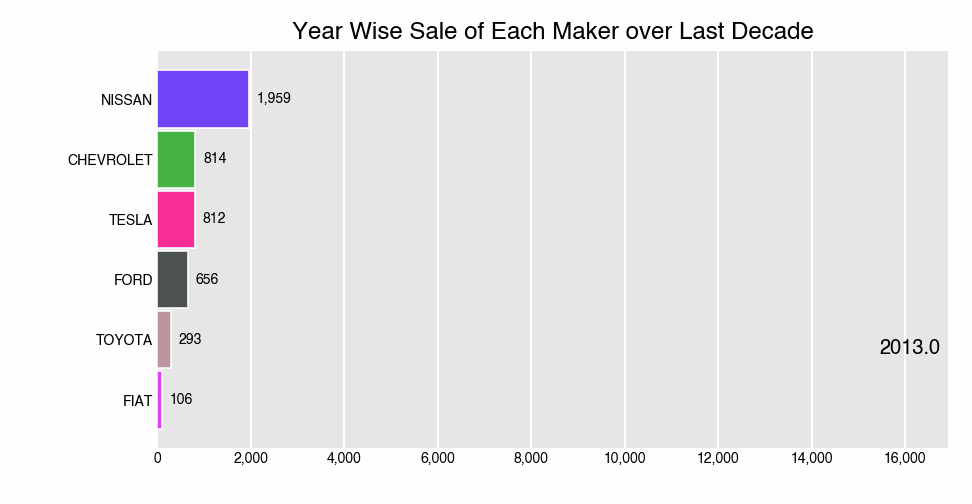

In [129]:
bcr.bar_chart_race(
    df=df_pivot,
    filename='ev_racing_bar.gif', 
    orientation='h',
    sort='desc',
    n_bars=6,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    period_length=2000,
    interpolate_period=False,
    bar_size=.95,
    filter_column_colors=True,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    # perpendicular_bar_func='median',
    title='Year Wise Sale of Each Maker over Last Decade',
    # shared_fontdict={'family': 'Helvetica', 'color': 'black', 'weight': 'bold'},
    scale='linear',
    writer='pillow'  
)

Image(filename='ev_racing_bar.gif')